## Imports and Packages


In [302]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## Cost function

### $$f(x) = x^2 + x + 1$$


In [303]:
def f(x):
    return x**2 + x + 1


# Make Data


In [304]:
x_1 = np.linspace(start=-3, stop=3, num=500)


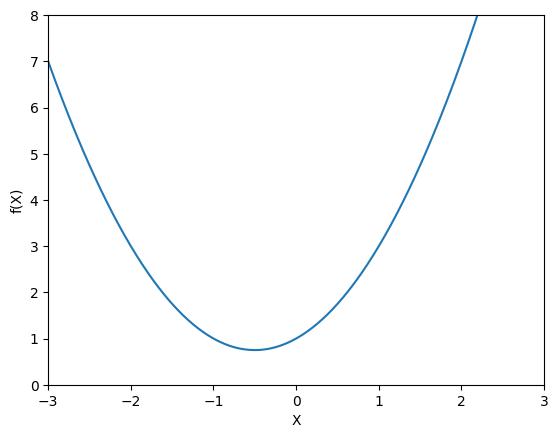

In [305]:
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1))


In [306]:
def df(x):
    return 2*x+1


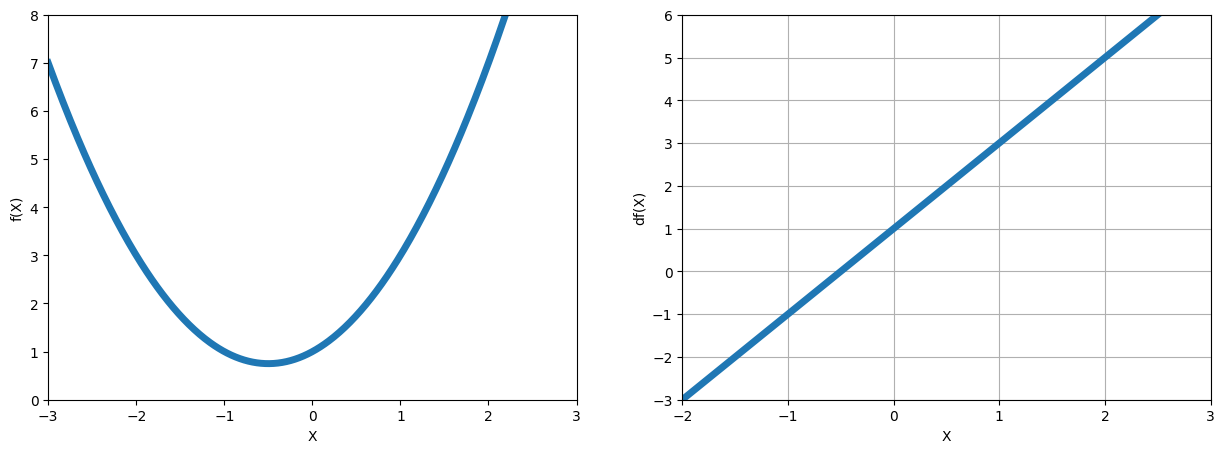

In [307]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1), linewidth=5)

plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.xlabel('X')
plt.grid()
plt.ylabel('df(X)')
plt.plot(x_1, df(x_1), linewidth=5)


## Python Loops & Gradient Descent


In [308]:
for n in range(5):
    print("Hello World")
print("End of loop")


Hello World
Hello World
Hello World
Hello World
Hello World
End of loop


In [309]:
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter += 1
print("Ready or not, here I came")


Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I came


In [310]:
new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(5000):
    previous_x = new_x
    # steepness tells how far to bottom , # slope being very very high indicates being far from the minimum value
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    x_list.append(new_x)
    slope_list.append(df(new_x))

    step_size = abs(new_x - previous_x)
    # print(step_size)
    if step_size < precision:
        print(n)
        break


print('Local Minimum occurs at', new_x)
print('Slope or df(x) at this point is ', df(new_x))
print('f(x) value or cost at this point is ', f(new_x))


49
Local Minimum occurs at -0.5000356811923176
Slope or df(x) at this point is  -7.136238463512079e-05
f(x) value or cost at this point is  0.7500000012731475


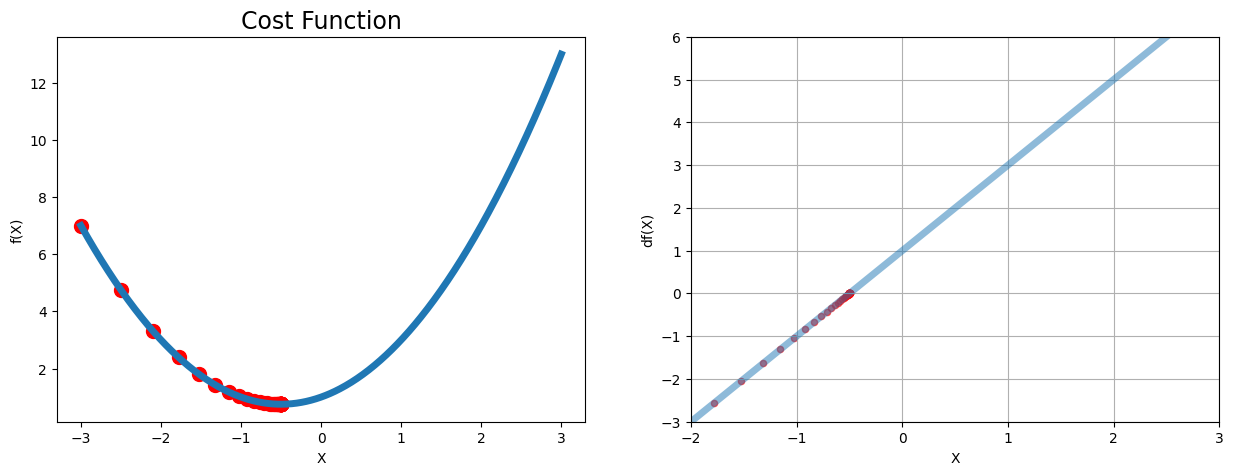

In [311]:
from turtle import color


plt.figure(figsize=[15, 5])

# cost functions
plt.subplot(1, 2, 1)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X')
plt.ylabel('f(X)')

plt.plot(x_1, f(x_1), linewidth=5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100)


# plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.xlabel('X')
plt.grid()
plt.ylabel('df(X)')
plt.plot(x_1, df(x_1), linewidth=5, alpha=0.5)

plt.scatter(x_list, slope_list, color="red", s=20, alpha=0.6)


# Multiple Minima vs initial guess and Advanced Functions

## $$g(X) = x^4- 4x^2 + 5$$


In [312]:
# Make some data

x_2 = np.linspace(-2, 2, 1000)


In [313]:
def g(x):
    return x**4 - 4*x**2 + 5


def dg(x):
    return 4*x**3 - 8*x


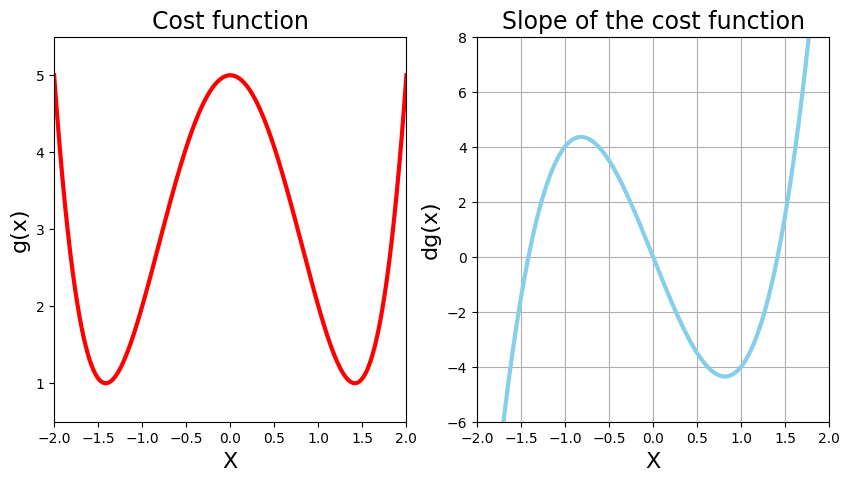

In [314]:
plt.figure(figsize=[10, 5])


# 1 chart cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)


plt.plot(x_2, g(x_2), color="red", linewidth=3)


# 2 derivative function

plt.subplot(1, 2, 2)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)


In [315]:
# gradient decent algorithm

def gradient_decent(derivative_func, initial_guess, multiplier, precision, max_iter=300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)

        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if (step_size) < precision:
            print("Loop ran this many times: ", n)
            break

    return new_x, x_list, slope_list


In [316]:
local_min, list_x, deriv_list = gradient_decent(dg, 0, 0.01, 0.0001)

print('Local min occurs at: ', local_min)
print('Number of steps', len(list_x))


Loop ran this many times:  0
Local min occurs at:  0.0
Number of steps 2


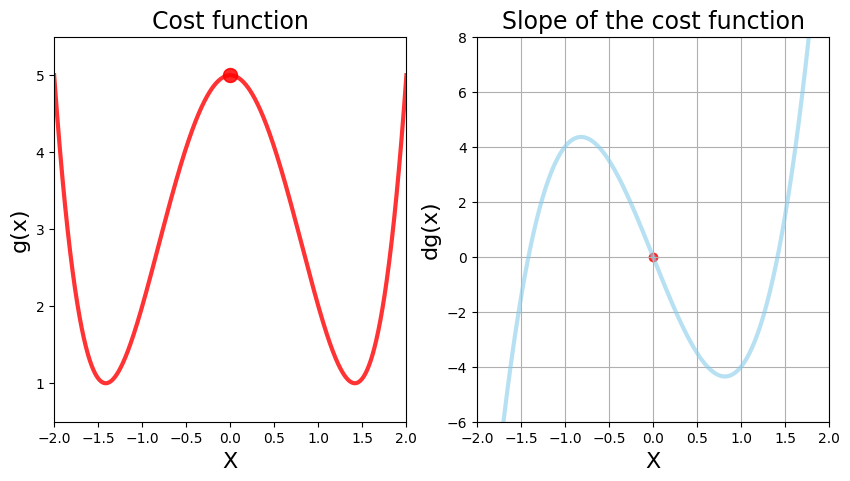

In [317]:
# Calling gradient descent function

plt.figure(figsize=[10, 5])


# 1 chart cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)


plt.plot(x_2, g(x_2), color="red", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)


# 2 derivative function

plt.subplot(1, 2, 2)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", alpha=0.5)


## Weakness detected

- Batch Gradient Descend

Depending on the slope the result will change


Divergence, Overflow and Python Tuples

## $$h(x) = x^5- 2x^4 +2$$


In [318]:
# Make data

x_3 = np.linspace(-2.5, 2.5, 1000)


def h(x):
    return x**5 - 2*x**4 + 2


def dh(x):
    return 5*x**4 - 8*x**3


Loop ran this many times:  237
local min occures at 1.5996867502869672
cost at this minimum is  -0.6214389955894664
Number of steps 239


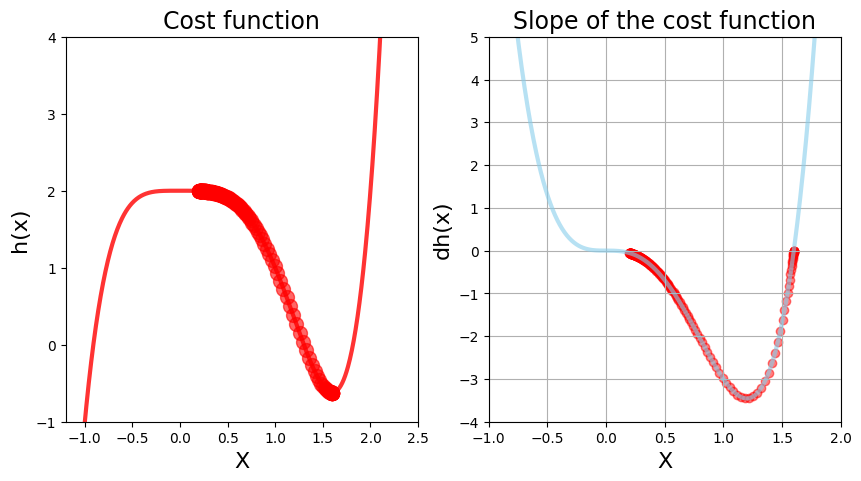

In [319]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_decent(
    dh, 0.2, 0.01, 0.0001, max_iter=500)
plt.figure(figsize=[10, 5])


# 1 chart cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)


plt.plot(x_3, h(x_3), color="red", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)


# 2 derivative function

plt.subplot(1, 2, 2)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color="skyblue", linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", alpha=0.5)


print('local min occures at', local_min)
print('cost at this minimum is ', h(local_min))
print('Number of steps', len(list_x))


# Learning Rate


Loop ran this many times:  344
local min occures at 1.6093964343762677
cost at this minimum is  -0.6205252136664736
Number of steps 346


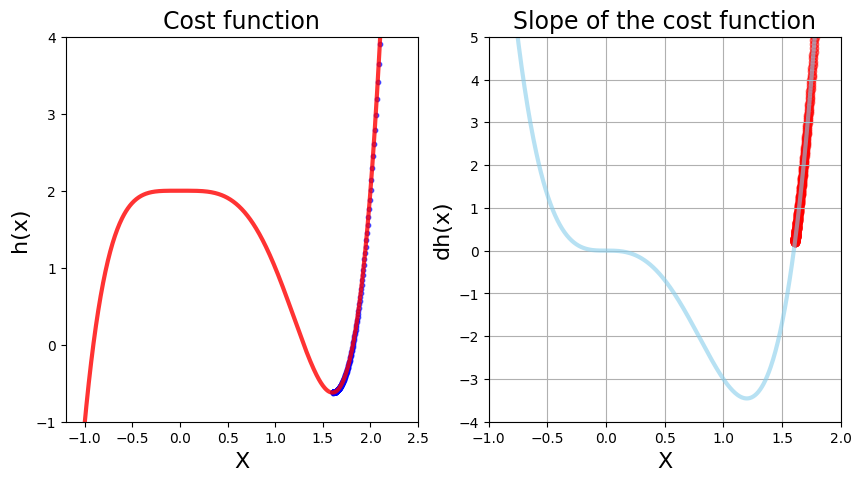

In [320]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_decent(
    dh, 3, 0.0005, 0.0001, max_iter=500)
plt.figure(figsize=[10, 5])


# 1 chart cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)


plt.plot(x_3, h(x_3), color="red", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color="blue", s=10, alpha=0.6)


# 2 derivative function

plt.subplot(1, 2, 2)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color="skyblue", linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", alpha=0.5)


print('local min occures at', local_min)
print('cost at this minimum is ', h(local_min))
print('Number of steps', len(list_x))


Loop ran this many times:  23


ValueError: x and y must have same first dimension, but have shapes (101,) and (25,)

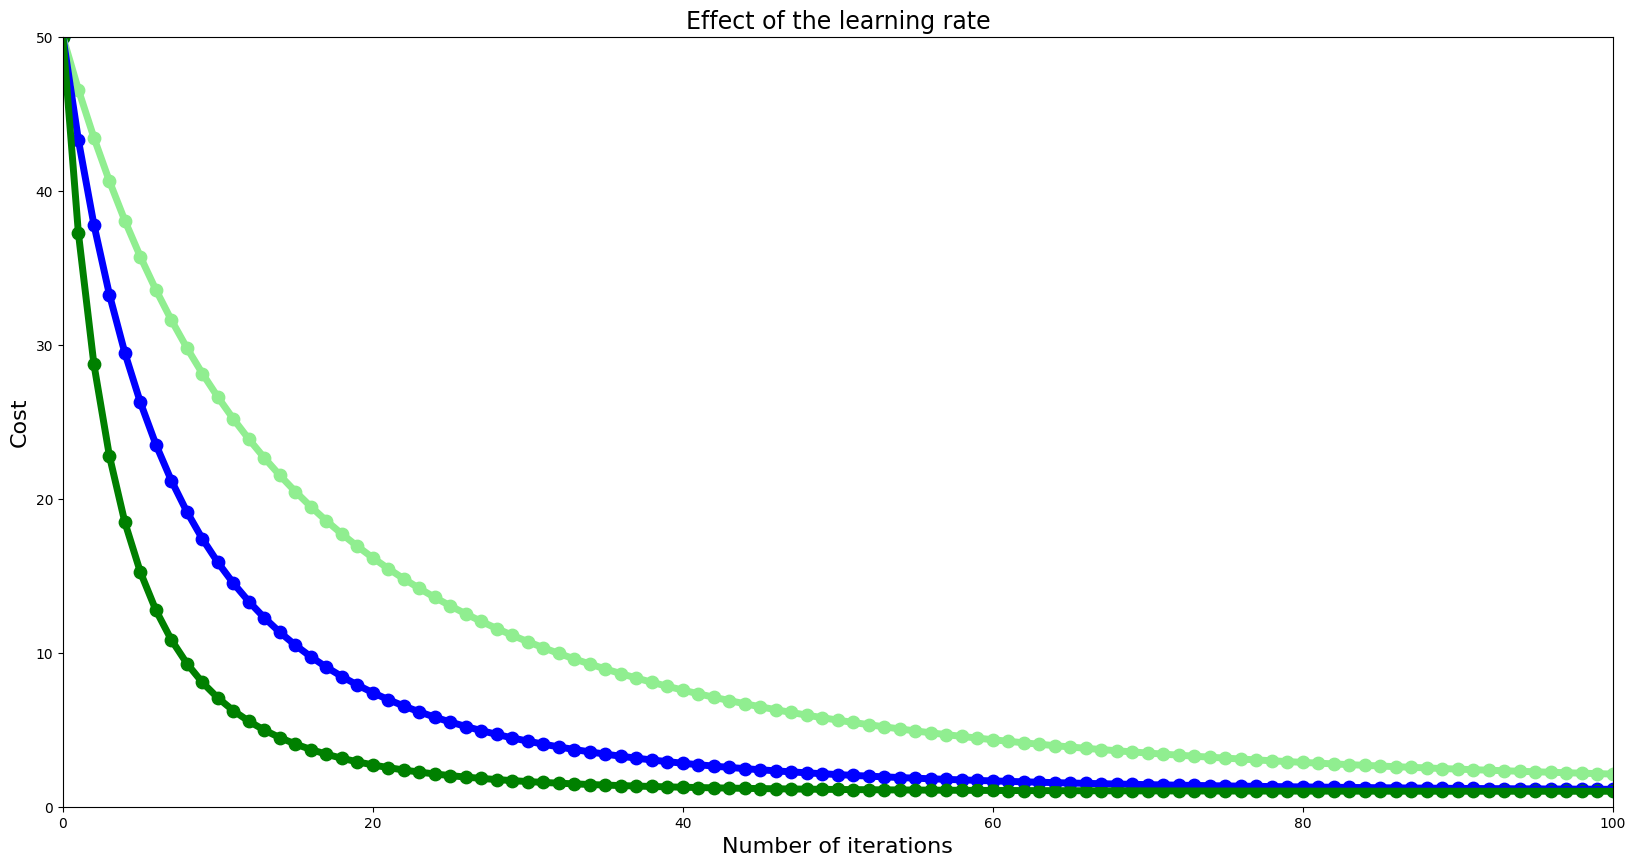

In [323]:
# Run gradient descent 3 times

n = 100
low_gamma = gradient_decent(dg, 3, 0.0005, 0.0001, n)
mid_gamma = gradient_decent(dg, 3, 0.001, 0.0001, n)
high_gamma = gradient_decent(dg, 3, 0.002, 0.0001, n)
insane_gamma = gradient_decent(dg, 3, 0.002, 0.00001, n)


#plotting reduction in cost for each iteration
plt.figure(figsize = [20,10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title("Effect of the learning rate", fontsize=17)
plt.xlabel("Number of iterations", fontsize=16)
plt.ylabel("Cost", fontsize = 16)

low_values = np.array(low_gamma[1])

iterations_list = list(range(0, n+1))

#ploting low learning rate
plt.plot(iterations_list, g(low_values), color="lightgreen", linewidth=5)
plt.scatter(iterations_list, g(low_values), color='lightgreen', s=80)

#plotting mid learning rate
plt.plot(iterations_list, g(np.array(mid_gamma[1])), color="blue", linewidth=5)
plt.scatter(iterations_list, g(np.array(mid_gamma[1])), color='blue', s=80)


#plotting mid learning rate
plt.plot(iterations_list, g(np.array(high_gamma[1])), color="green", linewidth=5)
plt.scatter(iterations_list, g(np.array(high_gamma[1])), color='green', s=80)

#plotting mid learning rate
plt.plot(iterations_list, g(np.array(insane_gamma[1])), color="red", linewidth=5)
plt.scatter(iterations_list, g(np.array(insane_gamma[1])), color='red', s=80)



